In [1]:
#### Vision par Ordinateur

#  Vision par ordinateur PyTorch
La vision par ordinateur est l’art d’apprendre à un ordinateur à voir.

Par exemple, il pourrait s’agir de construire un modèle permettant de classer si une photo représente un chat ou un chien ( classification binaire ).

Ou si une photo est celle d'un chat, d'un chien ou d'un poulet ( classification multi-classes ).

Ou identifier où une voiture apparaît dans une image vidéo ( détection d'objet ).

Ou déterminer où les différents objets d'une image peuvent être séparés ( segmentation panoptique ).

In [2]:
import torch
from torch import nn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

In [4]:
print(torch.__version__)
print(torchvision.__version__)

2.4.1+cu121
0.19.1+cu121


In [5]:
### for this problem classification of computer vision, we want to use the dataset of FashionMNIST
train_data = datasets.FashionMNIST(
    root = "data",
    train = True,
    download = True,
    transform = ToTensor(),
    target_transform = None
)
test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor()
)

In [6]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [7]:
## the shape of theirs images
image.shape

torch.Size([1, 28, 28])

In [8]:
### checkout the shape of data
len(train_data.data), len(test_data.data), len(train_data.targets), len(test_data.targets)

(60000, 10000, 60000, 10000)

In [9]:
classes = train_data.classes
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [10]:
image, label = train_data[1]
image, label
image.shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, '0')

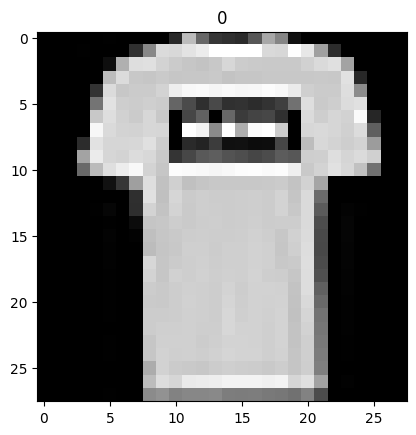

In [11]:
plt.imshow(image.squeeze(), cmap = "gray")
plt.title(label)

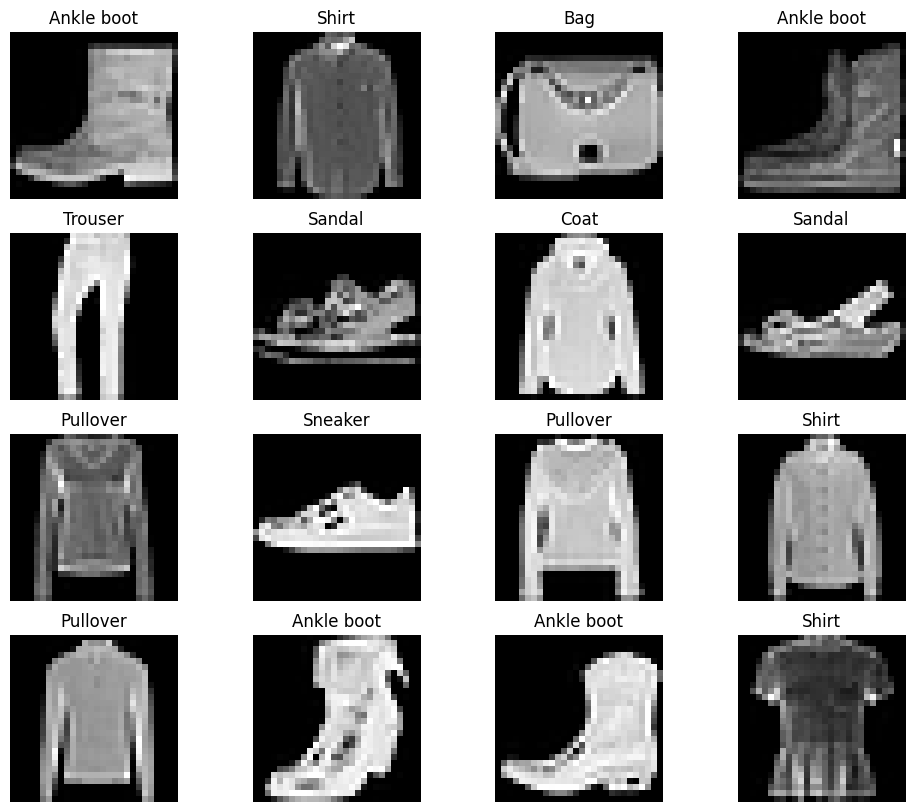

In [12]:
torch.manual_seed(42)
plt.figure(figsize = (12, 10))
rows, cols = 4, 4
for i in range(1, rows*cols +1):
    random_idx = torch.randint(0, len(train_data), size = [1]).item()
    img, label = train_data[random_idx]
    plt.subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap = 'gray')
    plt.axis('off')
    plt.title(classes[label])

## Prepare DataLoader

In [13]:
from torch.utils.data import DataLoader
train_dataloader = DataLoader(
    dataset = train_data,
    batch_size = 32,
    shuffle = True
)

test_dataloader = DataLoader(
    dataset = test_data,
    batch_size = 32,
    shuffle = False
)

print(len(train_dataloader), len(test_dataloader))

1875 313


In [14]:
train_features_batch, train_label_batch = next(iter(train_dataloader))
train_features_batch.shape, train_label_batch.shape


(torch.Size([32, 1, 28, 28]), torch.Size([32]))

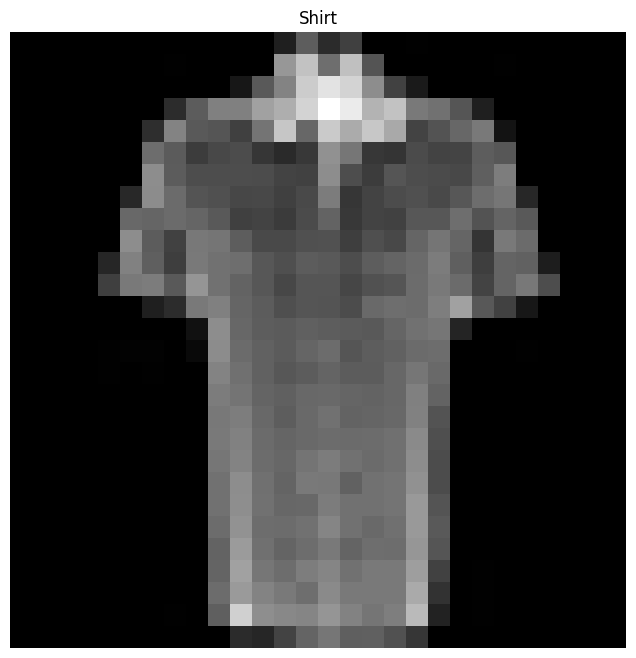

In [15]:
##  we can see that the data  sets inchanged
torch.manual_seed(42)
plt.figure(figsize = (8, 8))

random_idx = torch.randint(0, len(train_features_batch), size = [1]).item()
img, label = train_features_batch[random_idx], train_label_batch[random_idx]
plt.imshow(img.squeeze(), cmap = 'gray')
plt.title(classes[label])
plt.axis("off")
plt.show()

In [16]:
### we can now build the baseline model (model reference) for using to improve the model more complexes
### here , it's a few different we can use nn.Flatten() to compresse the images to flattenning the data an one dimensions
flatten_model = nn.Flatten()
x = train_features_batch[0]
output_flatten = flatten_model(x[0])
x.shape, output_flatten.shape

(torch.Size([1, 28, 28]), torch.Size([28, 28]))

In [17]:
print(output_flatten)

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0039, 0.0039, 0.0000, 0.0000, 0.0078, 0.0078, 0.0000, 0.0000, 0.0039,
         0.0078, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

In [18]:
### building the model baseline

class Vision(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.linear_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = input_shape, out_features = hidden_units),
        nn.Linear(in_features = hidden_units, out_features = output_shape)
    )
  def forward(self, x):
    return self.linear_stack(x)


In [19]:
model0 = Vision(784, 10, len(classes))
model0.parameters(), model0.state_dict()

(<generator object Module.parameters at 0x787dbbcd3920>,
 OrderedDict([('linear_stack.1.weight',
               tensor([[ 0.0296, -0.0084,  0.0328,  ...,  0.0093,  0.0135, -0.0188],
                       [-0.0354,  0.0187,  0.0085,  ..., -0.0001,  0.0115, -0.0008],
                       [ 0.0017,  0.0045,  0.0133,  ..., -0.0188,  0.0059,  0.0100],
                       ...,
                       [ 0.0273, -0.0344,  0.0127,  ...,  0.0283, -0.0011, -0.0230],
                       [ 0.0257,  0.0291,  0.0243,  ..., -0.0087,  0.0001,  0.0176],
                       [-0.0147,  0.0053, -0.0194,  ..., -0.0221,  0.0205, -0.0093]])),
              ('linear_stack.1.bias',
               tensor([ 0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,  0.0018,
                        0.0163,  0.0069])),
              ('linear_stack.2.weight',
               tensor([[-0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,  0.2019,
                         0.2847, -0.1495],
      

In [20]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [21]:
model0.to(device)

Vision(
  (linear_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [22]:
### loss function and optimizer
loss_fn  = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model0.parameters(), lr = 0.1 )

In [23]:
### create a time to experience on cpu
from timeit import default_timer as timer

def print_train_time(start: float, end: float, device: torch.device = None):
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [24]:

from torchmetrics import Accuracy
accuracy = Accuracy(task = "multiclass", num_classes = len(classes))

In [25]:
#### Training loop and testing loop

In [26]:
from tqdm import tqdm

train_time_start_on_cpu =timer()
torch.manual_seed(42)
epochs = 5
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n---------")
  train_loss = 0
  train_acc = 0
  for batch, (X, y) in enumerate(train_dataloader):
    model0.train()
    y_pred = model0(X)
    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_acc += accuracy(y_pred, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")
### divided train_loss and train _acc by length of train_dataloader
  train_loss /= len(train_dataloader)
  train_acc /= len(train_dataloader)
  test_loss, test_acc = 0, 0
  model0.eval()
  with torch.inference_mode():
    for X, y in test_dataloader:
      test_pred = model0(X)
      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy(y, test_pred.argmax(dim = 1))
    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)
  print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                           end=train_time_end_on_cpu,
                                           device=str(next(model0.parameters()).device))

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
---------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 20%|██        | 1/5 [00:15<01:02, 15.53s/it]


Train loss: 0.59484 | Test loss: 0.51635, Test acc: 0.82%

Epoch: 1
---------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 40%|████      | 2/5 [00:26<00:38, 12.93s/it]


Train loss: 0.47946 | Test loss: 0.48138, Test acc: 0.83%

Epoch: 2
---------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 60%|██████    | 3/5 [00:37<00:24, 12.15s/it]


Train loss: 0.45703 | Test loss: 0.47773, Test acc: 0.83%

Epoch: 3
---------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 80%|████████  | 4/5 [00:49<00:12, 12.02s/it]


Train loss: 0.44379 | Test loss: 0.46382, Test acc: 0.84%

Epoch: 4
---------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


100%|██████████| 5/5 [01:01<00:00, 12.26s/it]


Train loss: 0.43674 | Test loss: 0.46915, Test acc: 0.83%

Train time on cpu: 61.325 seconds


In [27]:
### make predictions and get results with model0 baseline
def eval_model(model: nn.Module,
               data_loader : torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn: accuracy):
  loss, acc = 0, 0
  with torch.inference_mode():
    for X, y in data_loader:
      # make predictions
      y_pred = model0(X)
      ### accumulate the loss and acc
      loss += loss_fn(y_pred, y)
      acc += accuracy(y, y_pred.argmax(dim = 1))
    loss /=len(data_loader)
    acc /= len(data_loader)
  return {"model_name": model.__class__.__name__,
          "model_loss": loss.item(),
          "model_acc": acc}

In [28]:
result_model = eval_model(model = model0,
                          data_loader = test_dataloader,
                          loss_fn = loss_fn,
                          accuracy_fn = accuracy)
result_model

{'model_name': 'Vision',
 'model_loss': 0.4691453278064728,
 'model_acc': tensor(0.8327)}

In [29]:
### Building the modek non Linearity

class ModelVision(nn.Module):
  def __init__(self, input_shape, hidden_units, output_shape):
    super().__init__()
    self.linear_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = input_shape, out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units, out_features = output_shape)
    )
  def forward(self, x = torch.Tensor):
    return self.linear_stack(x)

In [30]:
modelV1 = ModelVision(784, 10, len(classes))
modelV1.to(device)

ModelVision(
  (linear_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
    (5): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [31]:
### function of loss and accuracy
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = modelV1.parameters(), lr = 0.1)

In [32]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc  =0, 0
    model.to(device)
    for batch, (X, y) in enumerate(data_loader):
      X, y =X.to(device), y.to(device)
      model.train()
      y_pred = model(X)
      loss = loss_fn(y_pred, y)
      train_loss += loss
      train_acc += accuracy_fn(y_pred.argmax(dim = 1), y)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
    train_loss /=  len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")

def test_step(model: torch.nn.Module,
             data_loader: torch.utils.data.DataLoader,
             loss_fn: torch.nn.Module,
             accuracy_fn,
             device: torch.device = device):
  test_loss, test_acc = 0, 0
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      X, y = X.to(device), y.to(device)
      test_pred = model(X)
      test_loss +=loss_fn(test_pred, y)
      test_acc += accuracy_fn(y, test_pred.argmax(dim = 1))
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%")

In [33]:
torch.manual_seed(42)
epochs = 6
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n---------")
  train_step(model = modelV1,
             data_loader = train_dataloader,
             loss_fn = loss_fn,
             optimizer = optimizer,
             accuracy_fn = accuracy)

  test_step(model = modelV1,
            data_loader = test_dataloader,
            loss_fn = loss_fn,
            accuracy_fn = accuracy)

  0%|          | 0/6 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.71217 | Train acc: 0.73%


 17%|█▋        | 1/6 [00:12<01:01, 12.36s/it]

Test loss: 0.57603 | Test acc: 0.78%
Epoch: 1
---------
Train loss: 0.49868 | Train acc: 0.82%


 33%|███▎      | 2/6 [00:26<00:53, 13.30s/it]

Test loss: 0.49482 | Test acc: 0.82%
Epoch: 2
---------
Train loss: 0.45726 | Train acc: 0.84%


 50%|█████     | 3/6 [00:38<00:38, 12.87s/it]

Test loss: 0.48022 | Test acc: 0.83%
Epoch: 3
---------
Train loss: 0.43337 | Train acc: 0.84%


 67%|██████▋   | 4/6 [00:50<00:25, 12.65s/it]

Test loss: 0.44317 | Test acc: 0.84%
Epoch: 4
---------
Train loss: 0.41982 | Train acc: 0.85%


 83%|████████▎ | 5/6 [01:03<00:12, 12.49s/it]

Test loss: 0.48266 | Test acc: 0.82%
Epoch: 5
---------
Train loss: 0.40662 | Train acc: 0.85%


100%|██████████| 6/6 [01:15<00:00, 12.58s/it]

Test loss: 0.44867 | Test acc: 0.84%


In [34]:
result_modelV1 = eval_model(model = modelV1,
                          data_loader = test_dataloader,
                          loss_fn = loss_fn,
                          accuracy_fn = accuracy)
result_modelV1

{'model_name': 'ModelVision',
 'model_loss': 0.4691453278064728,
 'model_acc': tensor(0.8327)}

# Model Building with Convolutionnal Neural Network ConNet

In [35]:
class ConvNetModel(nn.Module):
  def __init__(self, input_shape, hidden_units, output_shape):
    super().__init__()
    self.block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape, out_channels=hidden_units,
                  kernel_size =3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units,
                  kernel_size =3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(
            kernel_size = 2)
        )
    self.block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units,
                  kernel_size =3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units,
                  kernel_size =3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(
            kernel_size = 2)
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_units*7*7, out_features = output_shape)
    )

  def forward(self, x: torch.Tensor):
    x =self.block_1(x)
    x =self.block_2(x)
    x = self.classifier(x)
    return x
torch.manual_seed(42)
ModelConv = ConvNetModel(input_shape = 1,
                         hidden_units = 10,
                         output_shape = len(classes))
ModelConv.to(device)

ConvNetModel(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [36]:
### function optimizer, loss
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = ModelConv.parameters(), lr = 0.1)

In [37]:
from torchmetrics import Accuracy
accuracy = Accuracy(task = "multiclass", num_classes = len(classes))

In [38]:
### Phase de formation et de testing
torch.manual_seed(42)

epochs = 6

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n---------")
  train_step(model = ModelConv,
             data_loader = train_dataloader,
             loss_fn = loss_fn,
             optimizer = optimizer,
             accuracy_fn = accuracy)
  test_step(model = ModelConv,
            data_loader = test_dataloader,
            loss_fn = loss_fn,
            accuracy_fn = accuracy)

  0%|          | 0/6 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.59518 | Train acc: 0.78%


 17%|█▋        | 1/6 [00:55<04:35, 55.19s/it]

Test loss: 0.39500 | Test acc: 0.86%
Epoch: 1
---------
Train loss: 0.36536 | Train acc: 0.87%


 33%|███▎      | 2/6 [01:50<03:40, 55.08s/it]

Test loss: 0.35244 | Test acc: 0.87%
Epoch: 2
---------
Train loss: 0.32588 | Train acc: 0.88%


 50%|█████     | 3/6 [02:45<02:45, 55.30s/it]

Test loss: 0.32719 | Test acc: 0.88%
Epoch: 3
---------
Train loss: 0.30489 | Train acc: 0.89%


 67%|██████▋   | 4/6 [03:41<01:51, 55.56s/it]

Test loss: 0.32312 | Test acc: 0.88%
Epoch: 4
---------
Train loss: 0.28981 | Train acc: 0.90%


 83%|████████▎ | 5/6 [04:36<00:55, 55.27s/it]

Test loss: 0.30836 | Test acc: 0.89%
Epoch: 5
---------
Train loss: 0.27944 | Train acc: 0.90%


100%|██████████| 6/6 [05:31<00:00, 55.18s/it]

Test loss: 0.29993 | Test acc: 0.89%


In [39]:
result_modelV2 = eval_model(model = ModelConv,
                          data_loader = test_dataloader,
                          loss_fn = loss_fn,
                          accuracy_fn = accuracy)
result_modelV2

{'model_name': 'ConvNetModel',
 'model_loss': 0.4691453278064728,
 'model_acc': tensor(0.8327)}

In [40]:
pd.DataFrame([result_model, result_modelV1, result_modelV2])

,model_name,model_loss,model_acc
0,Vision,0.469145,tensor(0.8327)
1,ModelVision,0.469145,tensor(0.8327)
2,ConvNetModel,0.469145,tensor(0.8327)
